In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Q11. 平滑化フィルタ

平滑化フィルタ(3x3)を実装せよ。

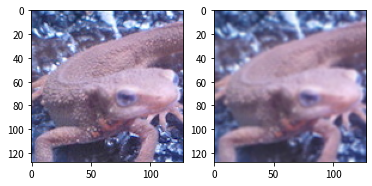

In [7]:
img = cv2.imread("imori.jpg")

K = np.ones((3,3),np.float32)/9

result = cv2.filter2D(img,-1,K) # 平滑化

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

# Q12. モーションフィルタ

モーションフィルタ(3x3)を実装せよ。

モーションフィルタとは対角方向の平均値を取るフィルタである.

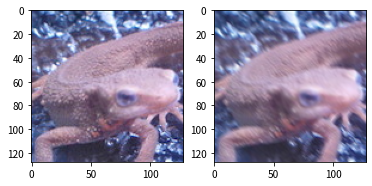

In [9]:
K = np.zeros((3,3),np.float32)
K[0][0] = 1/3
K[1][1] = 1/3
K[2][2] = 1/3

result = cv2.filter2D(img,-1,K) # モーションフィルタ

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

#  Q13. MAX-MINフィルタ
MAX-MINフィルタ(3x3)を実装せよ。

<ipython-input-11-f3aa3847e409>:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  out = np.zeros((H + pad * 2, W + pad * 2), dtype=np.float)
<ipython-input-11-f3aa3847e409>:36: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float)


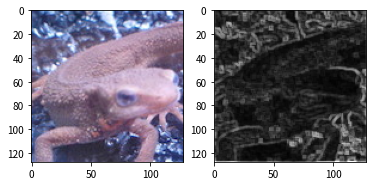

In [11]:
def gen_grayscale(img):
    green = img[:,:,0]
    blue = img[:,:,1]
    red = img[:,:,2]
    
    gray =  0.2126*red + 0.7152*green + 0.0722*blue
    
    gray = gray.astype(np.uint8)
    return gray

# max-min filter
def max_min_filter(img, K_size=3):
	if len(img.shape) == 3:
		H, W, C = img.shape

		## Zero padding
		pad = K_size // 2
		out = np.zeros((H + pad * 2, W + pad * 2, 3), dtype=np.float)
		out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float)
		tmp = out.copy()

		# filtering
		for y in range(H):
			for x in range(W):
				for c in range(3):
					out[pad + y, pad + x, c] = np.max(tmp[y: y + K_size, x: x + K_size, c]) - np.min(tmp[y: y + K_size, x: x + K_size, c])

		out = out[pad: pad + H, pad: pad + W].astype(np.uint8)

	else:
		H, W = img.shape

		## Zero padding
		pad = K_size // 2
		out = np.zeros((H + pad * 2, W + pad * 2), dtype=np.float)
		out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float)
		tmp = out.copy()

		# filtering
		for y in range(H):
			for x in range(W):
				out[pad + y, pad + x] = np.max(tmp[y: y + K_size, x: x + K_size]) - np.min(tmp[y: y + K_size, x: x + K_size])

		out = out[pad: pad + H, pad: pad + W].astype(np.uint8)

	return out
        
    

img_gray = gen_grayscale(img)
result = max_min_filter(img_gray)

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

# Q14. 微分フィルタ
微分フィルタ(3x3)を実装せよ。

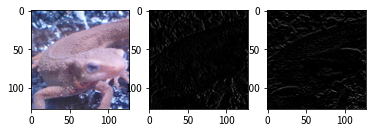

In [16]:
K_x = np.array([[0,0,0],[-1,1,0],[0,0,0]])
K_y = np.array([[0,-1,0],[0,1,0],[0,0,0]])

img_gray = gen_grayscale(img)

result_x = cv2.filter2D(img_gray,-1,K_x)
result_y = cv2.filter2D(img_gray,-1,K_y)

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(result_x, cv2.COLOR_BGR2RGB)) # x方向
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(result_y, cv2.COLOR_BGR2RGB)) # y方向
plt.show()

# Q15. Sobelフィルタ

Sobelフィルタ(3x3)を実装せよ。

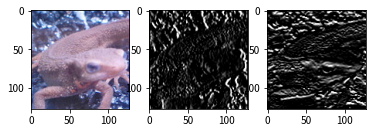

In [17]:
K_x = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
K_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

img_gray = gen_grayscale(img)

result_x = cv2.filter2D(img_gray,-1,K_x)
result_y = cv2.filter2D(img_gray,-1,K_y)

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(result_x, cv2.COLOR_BGR2RGB)) # x方向
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(result_y, cv2.COLOR_BGR2RGB)) # y方向
plt.show()

# Q16. Prewittフィルタ

Prewittフィルタ(3x3)を実装せよ。

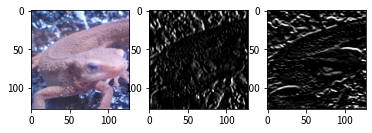

In [18]:
K_x = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
K_y = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

img_gray = gen_grayscale(img)

result_x = cv2.filter2D(img_gray,-1,K_x)
result_y = cv2.filter2D(img_gray,-1,K_y)

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(result_x, cv2.COLOR_BGR2RGB)) # x方向
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(result_y, cv2.COLOR_BGR2RGB)) # y方向
plt.show()

# Q17. ラプラシアンフィルタ
Laplacianフィルタを実装せよ。

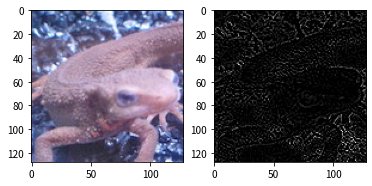

In [19]:
K = np.array([[0,1,0],[1,-4,1],[0,1,0]])

img_gray = gen_grayscale(img)

result = cv2.filter2D(img_gray,-1,K)

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

# Q18. Embossフィルタ

Embossフィルタを実装せよ。

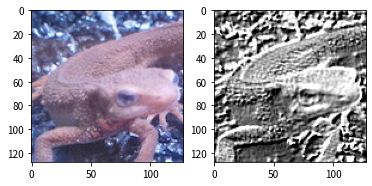

In [20]:
K = np.array([[-2,-1,0],[-1,1,1],[0,1,2]])

img_gray = gen_grayscale(img)

result = cv2.filter2D(img_gray,-1,K)

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

# Q19. LoGフィルタ
LoGフィルタ(sigma=3、カーネルサイズ=5)を実装し、imori_noise.jpgのエッジを検出せよ。

<ipython-input-30-9c88a4236124>:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  out = np.zeros((H + pad * 2, W + pad * 2), dtype=np.float)
<ipython-input-30-9c88a4236124>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float)
<ipython-input-30-9c88a4236124>:11: DeprecationWarning: `

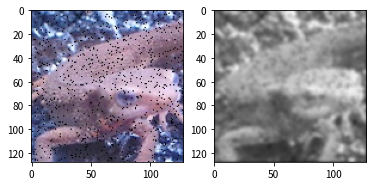

In [30]:
def LoG_filter(img, K_size=5, sigma=3):
	H, W = img.shape

	# zero padding
	pad = K_size // 2
	out = np.zeros((H + pad * 2, W + pad * 2), dtype=np.float)
	out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float)
	tmp = out.copy()

	# LoG Kernel
	K = np.zeros((K_size, K_size), dtype=np.float)
	for x in range(-pad, -pad + K_size):
		for y in range(-pad, -pad + K_size):
			K[y + pad, x + pad] = (x ** 2 + y ** 2 - sigma ** 2) * np.exp( -(x ** 2 + y ** 2) / (2 * (sigma ** 2)))
	K /= (2 * np.pi * (sigma ** 6))
	K /= K.sum()

	# filtering
	for y in range(H):
		for x in range(W):
			out[pad + y, pad + x] = np.sum(K * tmp[y: y + K_size, x: x + K_size])

	out = np.clip(out, 0, 255)
	out = out[pad: pad + H, pad: pad + W].astype(np.uint8)

	return out

img_noise = cv2.imread("imori_noise.jpg")
img_gray = gen_grayscale(img_noise)

result = LoG_filter(img_gray, K_size=5, sigma=3)

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img_noise, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()